# Experiment 3: Count Words Per Quotation


In [20]:
import pandas as pd
import nltk
%matplotlib inline
import math
from ast import literal_eval
import numpy as np
import re
from matplotlib import pyplot as plt
from colour import Color
from IPython.core.display import HTML
from matplotlib import cm
from matplotlib.colors import rgb2hex
plt.rcParams["figure.figsize"] = [16, 6]

In [2]:
df = pd.read_json('../txt/e2a.json')

In [3]:
# df['Locations in A'] = df['matches'].apply(lambda x: x[1])
df['Decade'] = df['year'] - (df['year'] % 10)

In [22]:
# Adapted from text-matcher
class Text: 
    def __init__(self, text): 
        self.text = text
        
    @property
    def tokens(self, removeStopwords=True): 
        """ Tokenizes the text, breaking it up into words, removing punctuation. """
        tokenizer = nltk.RegexpTokenizer('[a-zA-Z]\w+\'?\w*') # A custom regex tokenizer. 
        spans = list(tokenizer.span_tokenize(self.text))
        # Take note of how many spans there are in the text
        self.length = spans[-1][-1] 
        tokens = tokenizer.tokenize(self.text)
        tokens = [ token.lower() for token in tokens ] # make them lowercase
        if not removeStopwords: 
            self.spans = spans
            return tokens
        tokenSpans = list(zip(tokens, spans)) # zip it up
        stopwords = nltk.corpus.stopwords.words('english') # get stopwords
        tokenSpans = [ token for token in tokenSpans if token[0] not in stopwords ] # remove stopwords from zip
        self.spans = [ x[1] for x in tokenSpans ] # unzip; get spans
        return [ x[0] for x in tokenSpans ] # unzip; get tokens

In [24]:
mm = Text(open('../middlemarch.txt').read())

In [25]:
# Get the size of the text. 
textALength = 1793449

# I don't know why, but without the offset the novel ends too soon,
# with "unvisited tomb." This fixes it. 
offset = 2
textALength += offset

# Make an empty array the size of the text. 
tally = np.zeros(textALength, dtype=np.int)

In [26]:
len(tally)

1793451

In [27]:
# Read the locations from the CSV file, and literally evaluate them into lists. 
locations = df['Locations in A']
# locations = locations.apply(literal_eval)

In [28]:
type(locations[0])

list

In [48]:
starts = [loc[0][0] for loc in locDict]
weights = [loc[1] for loc in locDict]
hist = np.histogram(starts, bins=50, range=(0, textALength), weights=weights)[0]

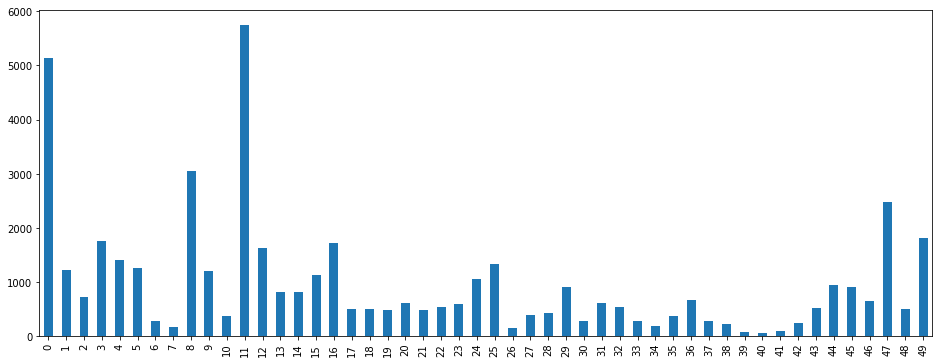

In [49]:
pd.Series(hist).plot(kind='bar')